In [56]:
import torch
from torch_geometric.data import Data
from torch_geometric.data import Batch
from ocpmodels.common import utils

In [63]:
from cp2k_reader import Cp2kTrajHold
tmp = Cp2kTrajHold('/Volumes/Extreme SSD/ocp_transfer/charge_new/Ni/N/out.txt', '/Volumes/Extreme SSD/ocp_transfer/charge_new/Ni/N/test.xyz')
tmp.extract_hirshfeld()
tmp.extract_mulliken()

In [64]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

In [ ]:
import pickle
atten_scores = pickle.load(open('/Volumes/Extreme SSD/ocp_transfer/attention_scores/eq_until7_EFfix/attention_score_Ni_N_C.pkl', 'rb'))

In [ ]:
from cp2k_reader import building_of_one_metal_special_traj
Ni_N_C_res = building_of_one_metal_special_traj('/Volumes/Extreme SSD/ocp_transfer/charge_new/Ni/N',
                                                '/Volumes/Extreme SSD/ocp_transfer/charge_new/Ni/base',
                                                '/Volumes/Extreme SSD/ocp_transfer/single_atom/gas/N',
                                                 1)

<Axes: >

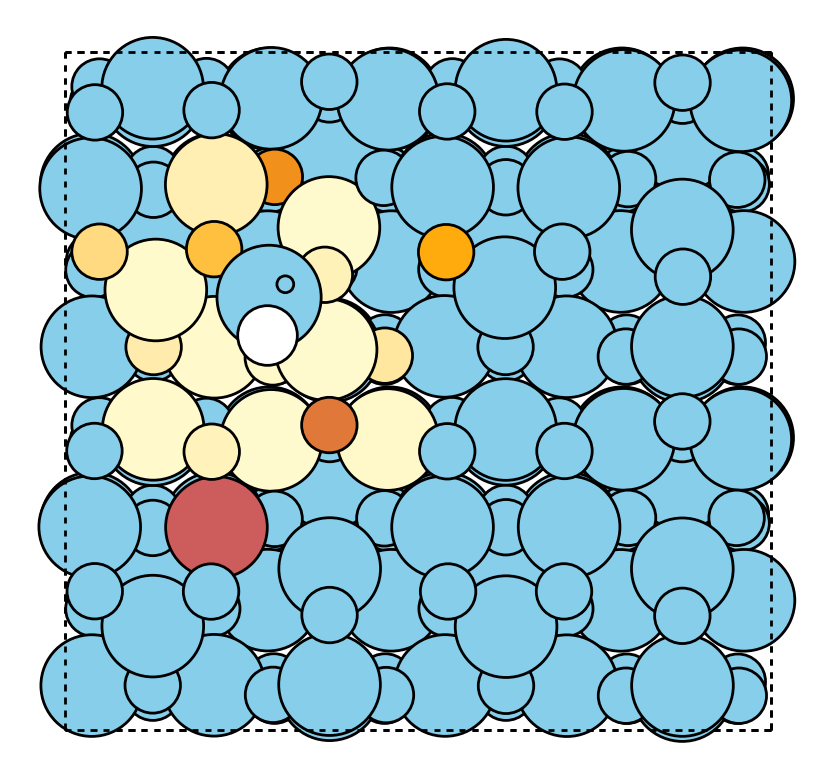

In [66]:
# Define the color gradient function
def interpolate_color(start_color, mid_color, end_color, weight):
    if weight <= 0.5:
        # Interpolate between start and mid color
        return interpolate_simple(start_color, mid_color, weight * 2)
    else:
        # Interpolate between mid and end color
        return interpolate_simple(mid_color, end_color, (weight - 0.5) * 2)

def interpolate_simple(c1, c2, weight):
    # Simple linear interpolation between two colors
    return tuple(c1[i] * (1 - weight) + c2[i] * weight for i in range(3))
soft_sky_blue_rgb = (135/255, 206/255, 235/255)
soft_yellow_rgb = (255/255, 250/255, 205/255)
soft_orange_rgb = (255/255, 165/255, 0/255)
warm_red_rgb = (205/255, 92/255, 92/255)

chose_atom = 242
fig, ax = plt.subplots(dpi=200)
ax.axis('off')
color_w_id = atten_scores[7]['edge_index'][0, atten_scores[7]['edge_index'][1]==chose_atom]
color_w = atten_scores[7]['alpha'][atten_scores[7]['edge_index'][1]==chose_atom, ...][:,:,2,:].reshape(-1)
color_w = (color_w - color_w.min())/(color_w.max() - color_w.min())
color_w = color_w.tolist()
colors = [soft_sky_blue_rgb]*243
for idx, c_idx in enumerate(color_w_id):
    if Ni_N_C_res[-1].numbers[c_idx] == 8 or Ni_N_C_res[-1].numbers[c_idx] == 13:
        colors[c_idx] = interpolate_color(soft_yellow_rgb, soft_orange_rgb, warm_red_rgb, color_w[idx])
colors[chose_atom] = (1,1,1)
plot_atoms(Ni_N_C_res[-1], ax, radii=1., colors=colors, rotation=('0x,0y,0z'))

<Axes: >

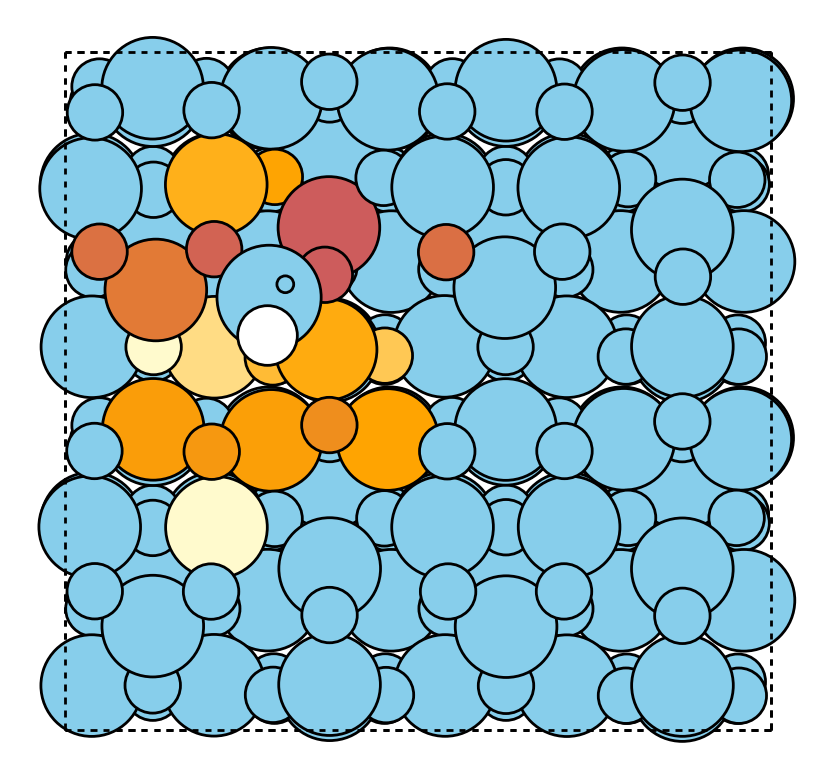

In [67]:
# Define the color gradient function
import numpy as np
def interpolate_color(start_color, mid_color, end_color, weight):
    if weight <= 0.5:
        # Interpolate between start and mid color
        return interpolate_simple(start_color, mid_color, weight * 2)
    else:
        # Interpolate between mid and end color
        return interpolate_simple(mid_color, end_color, (weight - 0.5) * 2)

def interpolate_simple(c1, c2, weight):
    # Simple linear interpolation between two colors
    return tuple(c1[i] * (1 - weight) + c2[i] * weight for i in range(3))
soft_sky_blue_rgb = (135/255, 206/255, 235/255)
soft_yellow_rgb = (255/255, 250/255, 205/255)
soft_orange_rgb = (255/255, 165/255, 0/255)
warm_red_rgb = (205/255, 92/255, 92/255)

chose_atom = 242
fig, ax = plt.subplots(dpi=200)
ax.axis('off')
color_w_id = atten_scores[7]['edge_index'][0, atten_scores[7]['edge_index'][1]==chose_atom]
Als = []
Os = []
for idx in color_w_id:
    if Ni_N_C_res[-1].numbers[idx] == 13:
        Als.append(idx)
    if Ni_N_C_res[-1].numbers[idx] == 8:
        Os.append(idx)
color_w_Als = np.array([float(tmp.outfile.data['mulliken'][-1][_][-2]) for _ in Als])
color_w_Os = np.array([float(tmp.outfile.data['mulliken'][-1][_][-2]) for _ in Os])

color_w_Als = (color_w_Als - color_w_Als.min())/(color_w_Als.max() - color_w_Als.min())
color_w_Os = (color_w_Os - color_w_Os.min())/(color_w_Os.max() - color_w_Os.min())

colors = [soft_sky_blue_rgb]*243
for idx, c_idx in enumerate(color_w_id):
    if Ni_N_C_res[-1].numbers[c_idx] == 13:
        colors[c_idx] = interpolate_color(soft_yellow_rgb, soft_orange_rgb, warm_red_rgb, color_w_Als[Als.index(c_idx)])
    elif Ni_N_C_res[-1].numbers[c_idx] == 8:
        colors[c_idx] = interpolate_color(soft_yellow_rgb, soft_orange_rgb, warm_red_rgb, color_w_Os[Os.index(c_idx)])
colors[chose_atom] = (1,1,1)
plot_atoms(Ni_N_C_res[-1], ax, radii=1., colors=colors, rotation=('0x,0y,0z'))

# PCA

In [1]:
# N adsorbate
import pickle
from cp2k_reader import building_of_one_metal_special_traj
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
import torch
index_to_atom = {26: 'Fe', 78: 'Pt', 45: 'Rh', 28: 'Ni', 29: 'Cu',
                 47: 'Ag', 79: 'Au', 46: 'Pd', 27: 'Co', 44: 'Ru', 75: 'Re'}   
chose_atoms = [242]
scores_tensor = None
species = []
for value in index_to_atom.values():
    if value in ['Fe', 'Rh', 'Pt']:
        continue
    species.append(value)
    for surf in ['N']:
        for charge, doc in zip(['_C'], ['charge_new']):
            atten_scores = pickle.load(open(f'/Volumes/Extreme SSD/ocp_transfer/attention_scores/eq_until7_EFfix/attention_score_{value}_{surf}{charge}.pkl', 'rb'))
            tmp_att = torch.zeros((0, ))
            for chose_atom in chose_atoms:
                color_w_id = atten_scores[7]['edge_index'][0, atten_scores[7]['edge_index'][1]==chose_atom]
                color_w = atten_scores[7]['alpha'][atten_scores[7]['edge_index'][1]==chose_atom, ...][:,:,:,:].reshape(-1)/8
                tmp_att = torch.cat([tmp_att, color_w], 0)
                print(color_w.shape)
            if scores_tensor is None:
                scores_tensor = tmp_att.reshape(1, -1)
            else:
                scores_tensor = torch.cat([scores_tensor, tmp_att.reshape(1, -1)], 0)


/Users/shaoketong/anaconda3/envs/new-ocp-models/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([168])
torch.Size([168])
torch.Size([168])
torch.Size([168])
torch.Size([168])
torch.Size([168])
torch.Size([168])
torch.Size([168])


In [27]:
# NH3 adsorbate
import pickle
from cp2k_reader import building_of_one_metal_special_traj
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
import torch
chose_atoms = [242]#[241, 242, 243, 244]
scores_tensor = None
species = []
for value in index_to_atom.values():
    if value in ['Fe', 'Rh', 'Pt']:
        continue
    species.append(value)
    for surf in ['N']:
        for charge, doc in zip(['_C'], ['charge_new']):
            atten_scores = pickle.load(open(f'/Volumes/Extreme SSD/ocp_transfer/attention_scores/eq_until7_EFfix/attention_score_{value}_{surf}{charge}.pkl', 'rb'))
            tmp_att = torch.zeros((0, ))
            for chose_atom in chose_atoms:
                color_w_id = atten_scores[7]['edge_index'][0, atten_scores[7]['edge_index'][1]==chose_atom]
                color_w = atten_scores[7]['alpha'][atten_scores[7]['edge_index'][1]==chose_atom, ...][:,:,:,:].reshape(-1)/8
                tmp_att = torch.cat([tmp_att, color_w], 0)
                print(color_w.shape)
            if scores_tensor is None:
                scores_tensor = tmp_att.reshape(1, -1)
            else:
                scores_tensor = torch.cat([scores_tensor, tmp_att.reshape(1, -1)], 0)


torch.Size([168])
torch.Size([168])
torch.Size([168])
torch.Size([168])
torch.Size([168])
torch.Size([168])
torch.Size([168])
torch.Size([168])


In [2]:
scores_tensor = scores_tensor.numpy()

In [3]:
import numpy as np
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=3,)
pca.fit(scores_tensor)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.4595989  0.21758543 0.12713799]
[0.39234588 0.26995695 0.20635608]


In [25]:
pca.transform(scores_tensor)

array([[-0.01250486,  0.13177395, -0.01852864],
       [ 0.00768377,  0.13443793,  0.00873841],
       [ 0.21158174, -0.06259866,  0.01182618],
       [ 0.22150481, -0.07455273,  0.00948755],
       [-0.01166281,  0.06109209, -0.10415087],
       [-0.10591886,  0.02564266,  0.12767511],
       [-0.14369028, -0.09588843,  0.06665091],
       [-0.16699351, -0.11990681, -0.10169865]])

/var/folders/xl/2k7fxsd176n4d7pm2_k1v01w0000gn/T/ipykernel_56746/581473042.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, z, color=colors[idx], marker=markers[idx % len(markers)], alpha=0.7, edgecolor='k', s=500)
/var/folders/xl/2k7fxsd176n4d7pm2_k1v01w0000gn/T/ipykernel_56746/581473042.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, z, color=colors[idx], marker=markers[idx % len(markers)], alpha=0.7, edgecolor='k', s=500)


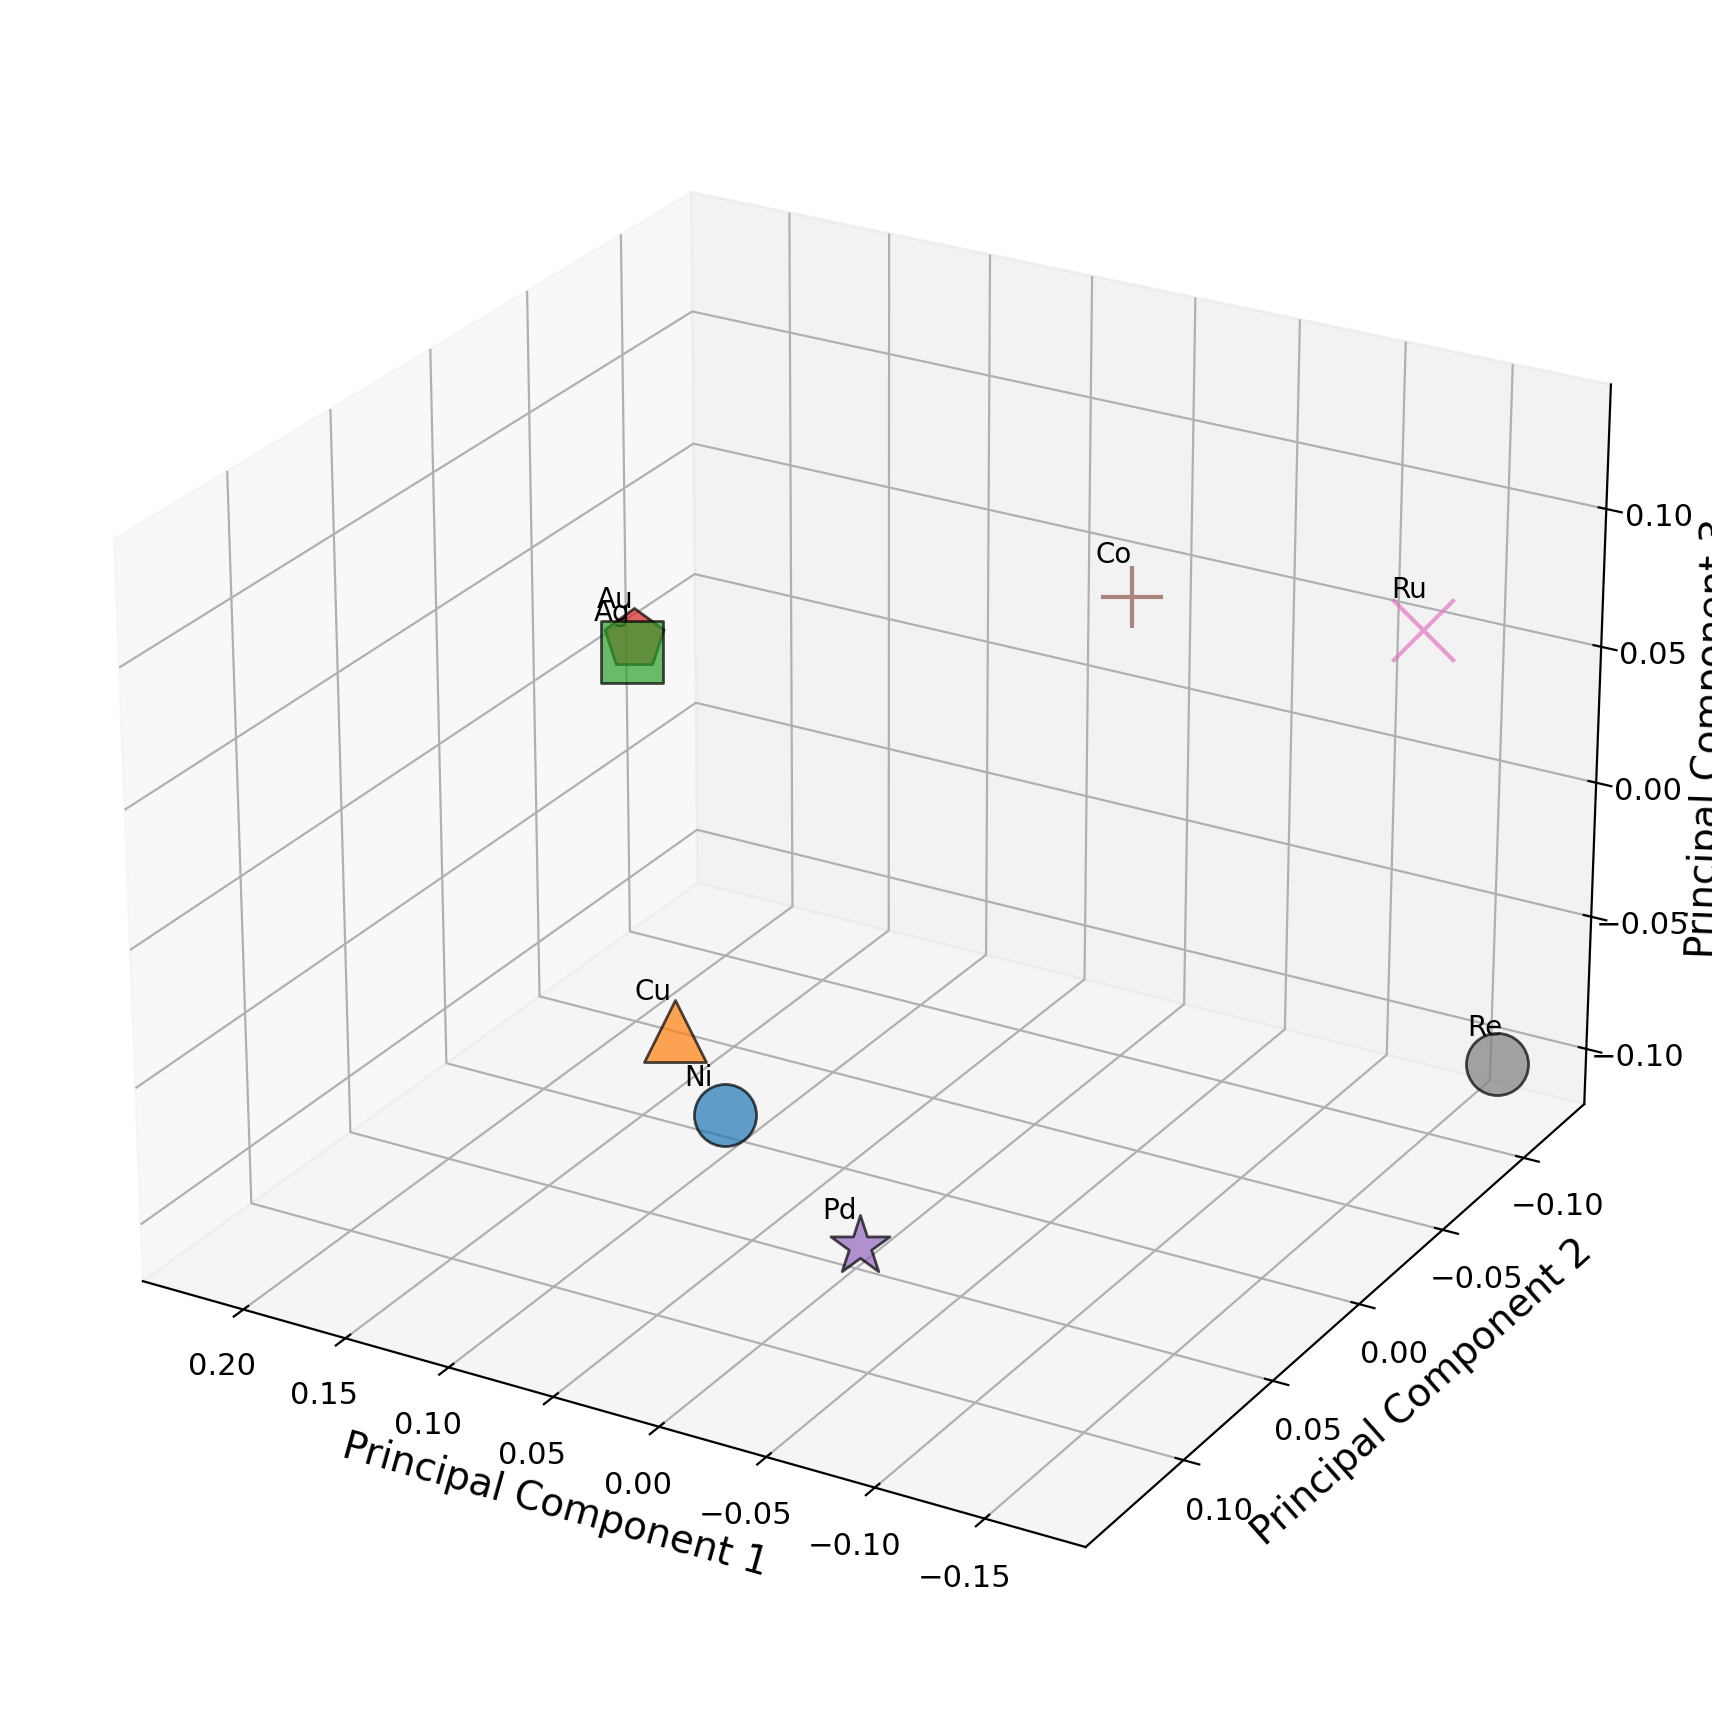

In [6]:
import matplotlib.pyplot as plt
# Example: Improve the plot aesthetics and readability
fig = plt.figure(figsize=(10, 10), dpi=200)  # Bigger figure size
ax = fig.add_subplot(111, projection='3d')

# Assuming 'transformed_scores' and 'species' are defined
# Use a colormap and different markers
colors = plt.cm.tab10(range(len(species)))
markers = ['o', '^', 's', 'p', '*', '+', 'x']  # Extend as needed

for idx, spec in enumerate(species):
    x, y, z = pca.transform(scores_tensor)[idx, 0], pca.transform(scores_tensor)[idx, 1], pca.transform(scores_tensor)[idx, 2]
    ax.scatter(x, y, z, color=colors[idx], marker=markers[idx % len(markers)], alpha=0.7, edgecolor='k', s=500)
    ax.text(x, y+0.02, z+0.021, spec, size=10)  # Annotate each point with the species name

#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.set_zlabel('Principal Component 3', fontsize=14)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.tick_params(axis='z', labelsize=11)
ax.view_init(elev=25, azim=120)
ax.grid(True)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.subplots_adjust(left=0.15)
#plt.savefig('fixed_figure.png', bbox_inches='tight', pad_inches=0.5)

plt.show()


/var/folders/xl/2k7fxsd176n4d7pm2_k1v01w0000gn/T/ipykernel_56746/3938318421.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x, y, marker=markers[idx % len(markers)], label=spec, s=500,
/var/folders/xl/2k7fxsd176n4d7pm2_k1v01w0000gn/T/ipykernel_56746/3938318421.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x, y, marker=markers[idx % len(markers)], label=spec, s=500,


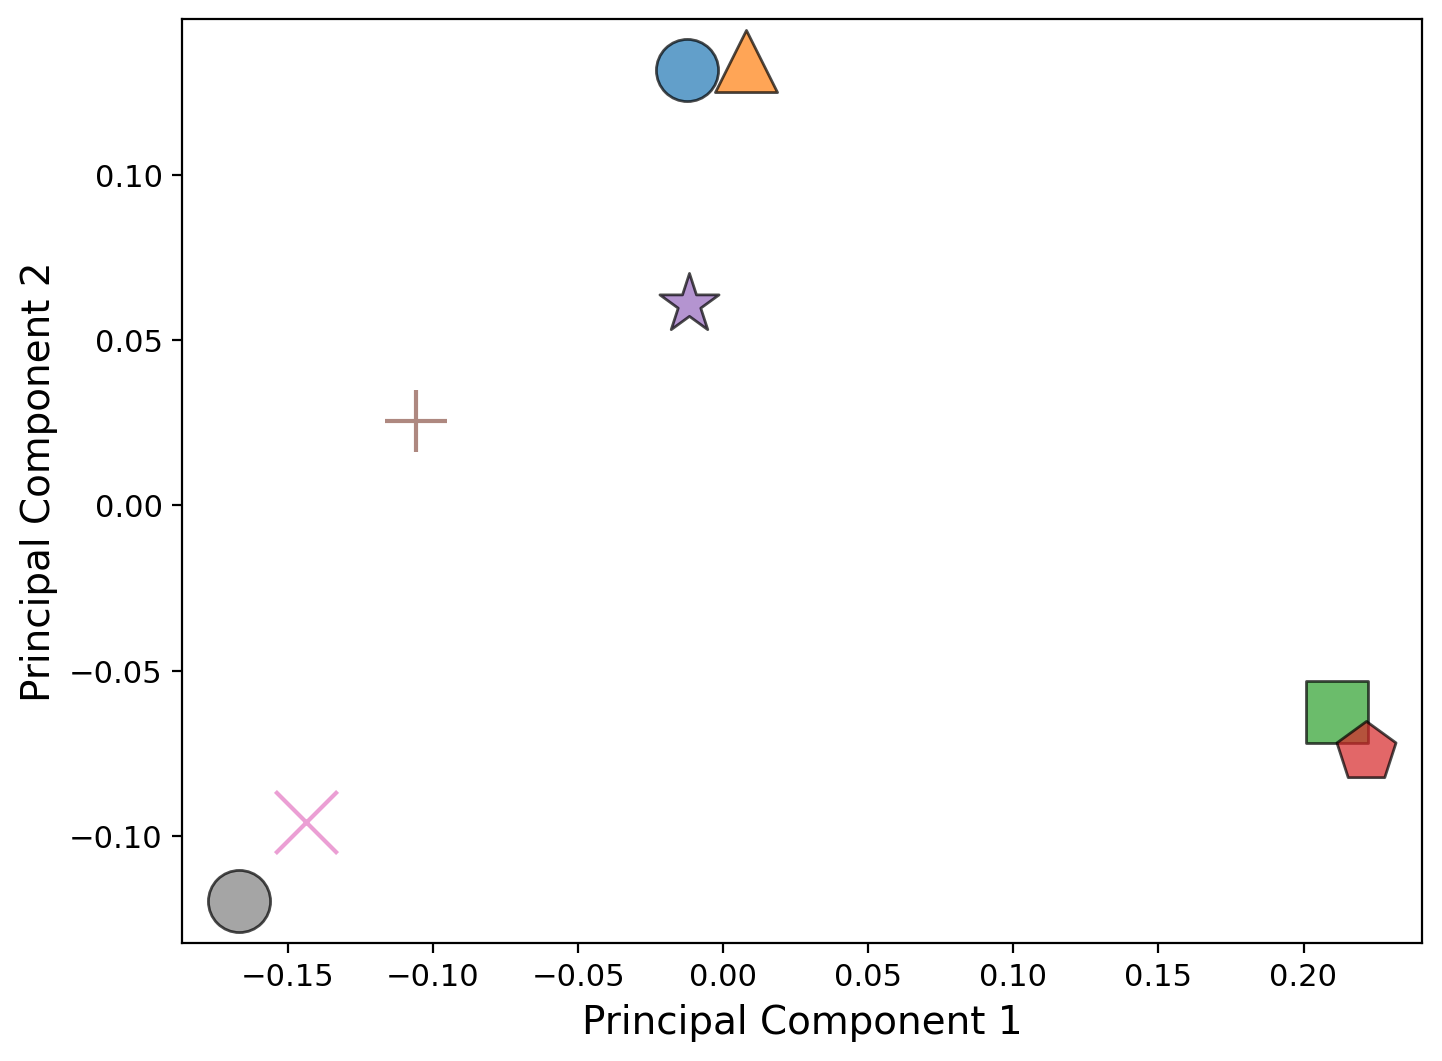

In [16]:
plt.figure(figsize=(8, 6), dpi=200)
for idx, spec in enumerate(species):
    x, y, z = pca.transform(scores_tensor)[idx, 0], pca.transform(scores_tensor)[idx, 1], pca.transform(scores_tensor)[idx, 2]
    plt.scatter(x, y, marker=markers[idx % len(markers)], label=spec, s=500,
                alpha=0.7, edgecolor='k',)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.tick_params(axis='x', labelsize=11)
plt.tick_params(axis='y', labelsize=11)

/var/folders/xl/2k7fxsd176n4d7pm2_k1v01w0000gn/T/ipykernel_56746/50758741.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y, z, marker=markers[idx % len(markers)], label=spec, s=500,
/var/folders/xl/2k7fxsd176n4d7pm2_k1v01w0000gn/T/ipykernel_56746/50758741.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y, z, marker=markers[idx % len(markers)], label=spec, s=500,


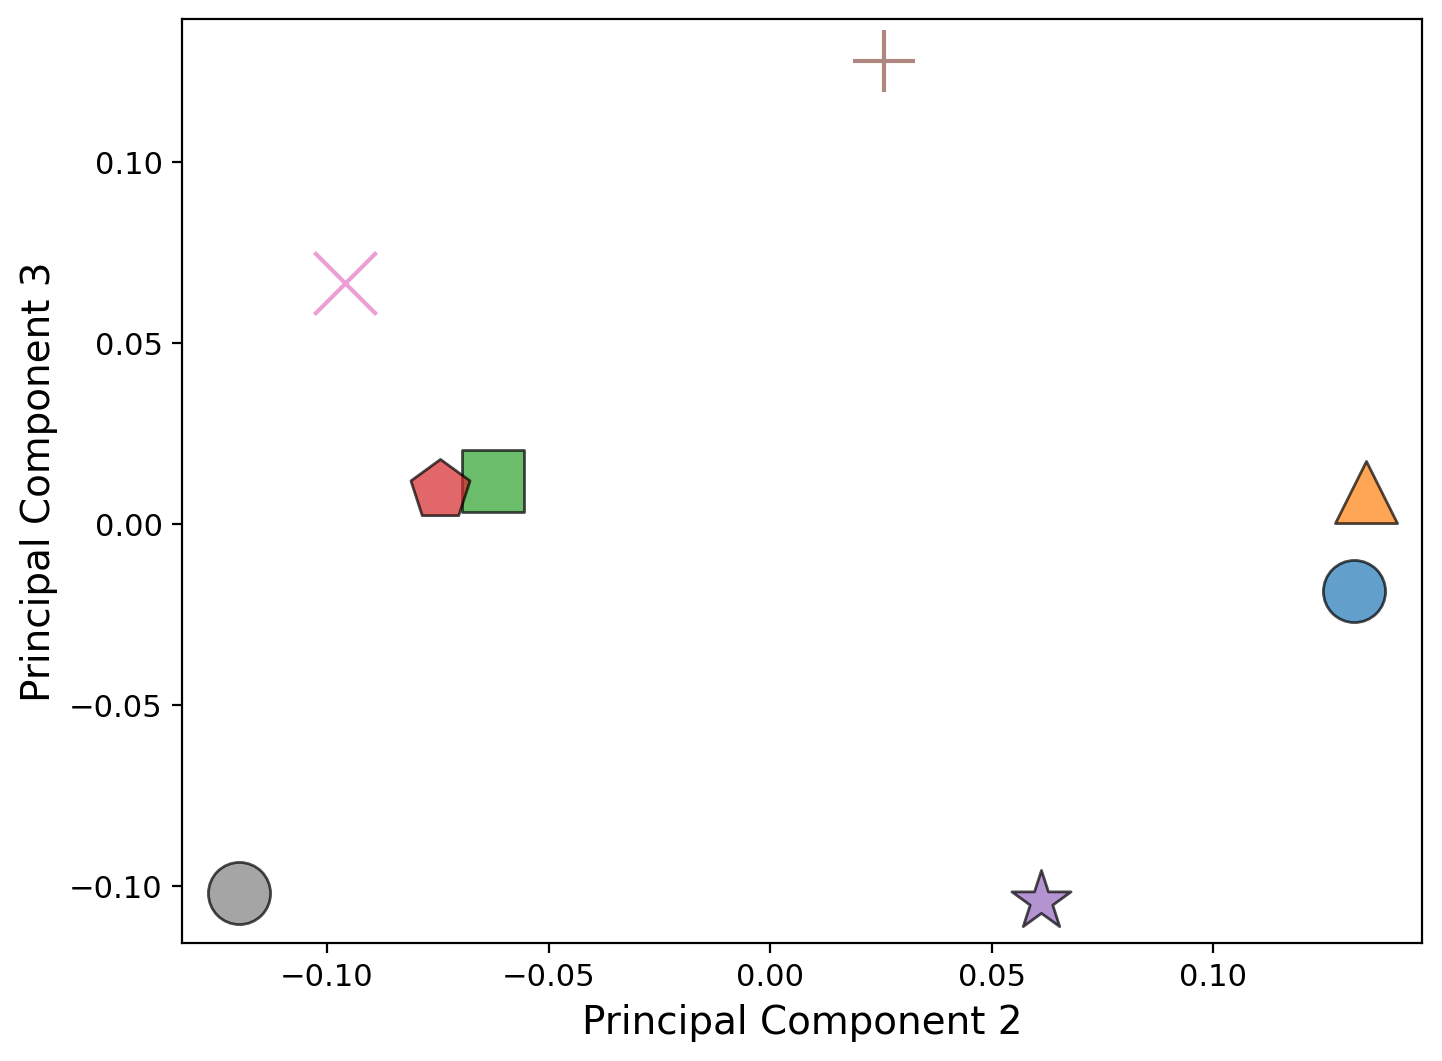

In [17]:
plt.figure(figsize=(8, 6), dpi=200)
for idx, spec in enumerate(species):
    x, y, z = pca.transform(scores_tensor)[idx, 0], pca.transform(scores_tensor)[idx, 1], pca.transform(scores_tensor)[idx, 2]
    plt.scatter(y, z, marker=markers[idx % len(markers)], label=spec, s=500,
                alpha=0.7, edgecolor='k',)
plt.xlabel('Principal Component 2', fontsize=14)
plt.ylabel('Principal Component 3', fontsize=14)
plt.tick_params(axis='x', labelsize=11)
plt.tick_params(axis='y', labelsize=11)

/var/folders/xl/2k7fxsd176n4d7pm2_k1v01w0000gn/T/ipykernel_56746/4180646868.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(z, x, marker=markers[idx % len(markers)], label=spec, s=500,
/var/folders/xl/2k7fxsd176n4d7pm2_k1v01w0000gn/T/ipykernel_56746/4180646868.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(z, x, marker=markers[idx % len(markers)], label=spec, s=500,


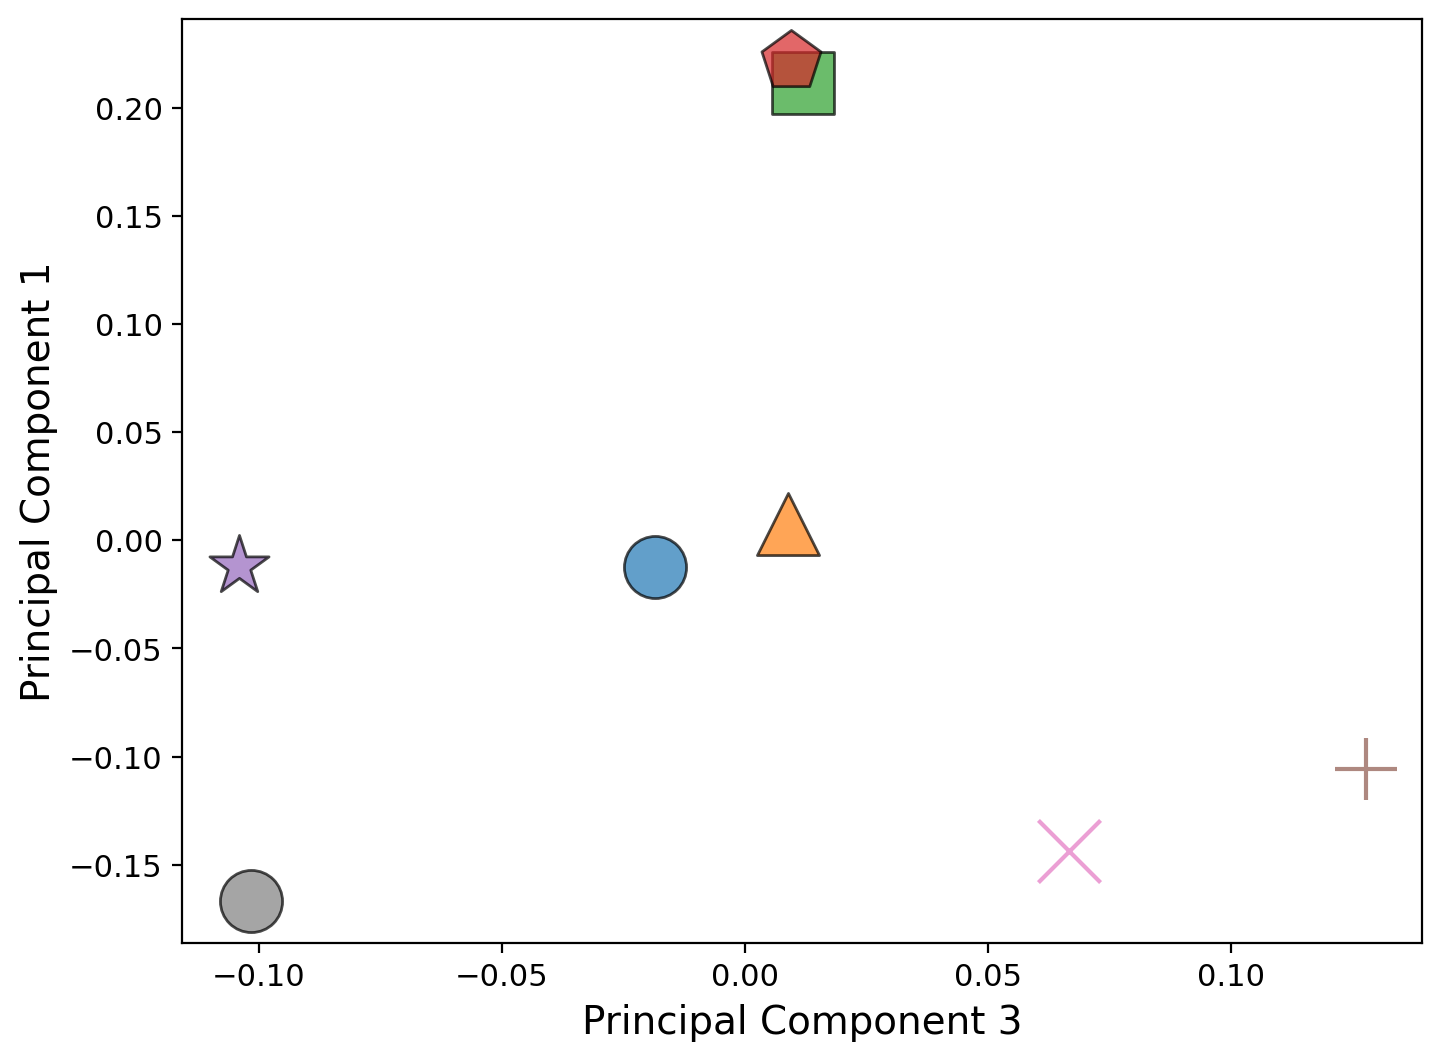

In [18]:
plt.figure(figsize=(8, 6), dpi=200)
for idx, spec in enumerate(species):
    x, y, z = pca.transform(scores_tensor)[idx, 0], pca.transform(scores_tensor)[idx, 1], pca.transform(scores_tensor)[idx, 2]
    plt.scatter(z, x, marker=markers[idx % len(markers)], label=spec, s=500,
                alpha=0.7, edgecolor='k',)
plt.xlabel('Principal Component 3', fontsize=14)
plt.ylabel('Principal Component 1', fontsize=14)
plt.tick_params(axis='x', labelsize=11)
plt.tick_params(axis='y', labelsize=11)

# Physical Explain

In [68]:
%load_ext autoreload
%autoreload 2
from cp2k_reader import Cp2kTrajHold

In [69]:
tmp = Cp2kTrajHold('/Volumes/Extreme SSD/ocp_transfer/charge_new/Ni/N/out.txt', '/Volumes/Extreme SSD/ocp_transfer/charge_new/Ni/N/test.xyz')

In [70]:
tmp.extract_mulliken()
tmp.extract_hirshfeld()

In [76]:
import torch
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import kendalltau

metal = 'Ag'
adsorbate = 'NH3'
tmp = Cp2kTrajHold(f'/Volumes/Extreme SSD/ocp_transfer/charge_new/{metal}/{adsorbate}/out.txt',
                   f'/Volumes/Extreme SSD/ocp_transfer/charge_new/{metal}/{adsorbate}/test.xyz')
tmp.extract_hirshfeld()
tmp.extract_mulliken()
for att in range(8):
    chose_atom = 242
    atten_scores = pickle.load(open(f'/Volumes/Extreme SSD/ocp_transfer/attention_scores/eq_until7_EFfix/attention_score_{metal}_{adsorbate}_C.pkl', 'rb'))
    color_w_id = atten_scores[7]['edge_index'][0, atten_scores[7]['edge_index'][1]==chose_atom]
    color_w = atten_scores[7]['alpha'][atten_scores[7]['edge_index'][1]==chose_atom, ...][:,:,att,:].reshape(-1)
    color_w = (color_w - color_w.min())/(color_w.max() - color_w.min())
    color_w = color_w.tolist()
    colors = [(0.,150/256, 0)]*246
    for idx, c_idx in enumerate(color_w_id):
        colors[c_idx] = (colors[c_idx][0], 150/256, color_w[idx])
    scores = np.array([colors[_][-1] for _ in range(len(colors))])
    mask = scores != 0
    # check mulliken net charge
    mulliken = tmp.outfile.data['mulliken'][-1]
    mulliken = np.array([float(mulliken[_][-2]) for _ in range(len(mulliken))])*mask
    spearman_corr, spearman_p_value = spearmanr(scores[mask], mulliken[mask])
    print(att)
    print(f"Spearman's correlation coefficient: {spearman_corr}")
    print(f"P-value: {spearman_p_value}")

0
Spearman's correlation coefficient: 0.41503759398496237
P-value: 0.06880769728594098
1
Spearman's correlation coefficient: -0.016541353383458645
P-value: 0.9448174502147446
2
Spearman's correlation coefficient: -0.6962406015037594
P-value: 0.0006499244054973399
3
Spearman's correlation coefficient: -0.6360902255639098
P-value: 0.002571107276428487
4
Spearman's correlation coefficient: 0.40751879699248117
P-value: 0.07450821585547025
5
Spearman's correlation coefficient: 0.5894736842105263
P-value: 0.006233369103076906
6
Spearman's correlation coefficient: -0.6526315789473683
P-value: 0.0018136097760447342
7
Spearman's correlation coefficient: 0.6796992481203006
P-value: 0.0009782817239871893


In [152]:
import torch
import numpy as np
from scipy.stats import spearmanr

metal = 'Ag'
adsorbate = 'N'
tmp = Cp2kTrajHold(f'/Volumes/Extreme SSD/ocp_transfer/charge_new/{metal}/{adsorbate}/out.txt',
                   f'/Volumes/Extreme SSD/ocp_transfer/charge_new/{metal}/{adsorbate}/test.xyz')
tmp.extract_hirshfeld()
tmp.extract_mulliken()
for att in range(8):
    chose_atom = 242
    atten_scores = pickle.load(open(f'/Volumes/Extreme SSD/ocp_transfer/attention_scores/eq_until7_EFfix/attention_score_{metal}_{adsorbate}_C.pkl', 'rb'))
    color_w_id = atten_scores[7]['edge_index'][0, atten_scores[7]['edge_index'][1]==chose_atom]
    color_w = atten_scores[7]['alpha'][atten_scores[7]['edge_index'][1]==chose_atom, ...][:,:,att,:].reshape(-1)
    color_w = (color_w - color_w.min())/(color_w.max() - color_w.min())
    color_w = color_w.tolist()
    colors = [(0.,150/256, 0)]*243
    for idx, c_idx in enumerate(color_w_id):
        colors[c_idx] = (colors[c_idx][0], 150/256, color_w[idx])
    scores = np.array([colors[_][-1] for _ in range(len(colors))])
    mask = scores != 0
    # check hirshfeld net charge
    hirshfeld = tmp.outfile.data['hirshfeld'][-1]
    hirshfeld = np.array([float(hirshfeld[_][-4]) for _ in range(len(hirshfeld))])*mask
    spearman_corr, spearman_p_value = spearmanr(scores[mask], mulliken[mask])
    print(att)
    print(f"Spearman's correlation coefficient: {spearman_corr}")
    print(f"P-value: {spearman_p_value}")

0
Spearman's correlation coefficient: -0.2226401060042814
P-value: 0.34543451709537787
1
Spearman's correlation coefficient: 0.1195938407252728
P-value: 0.6155193242118198
2
Spearman's correlation coefficient: 0.2504701192548166
P-value: 0.28682746838442463
3
Spearman's correlation coefficient: 0.45280183721141015
P-value: 0.0449849483733339
4
Spearman's correlation coefficient: -0.5144791638747584
P-value: 0.020290875397564544
5
Spearman's correlation coefficient: -0.16547575446264157
P-value: 0.48567134143966206
6
Spearman's correlation coefficient: 0.32418204624272057
P-value: 0.16318673664814487
7
Spearman's correlation coefficient: -0.724812030075188
P-value: 0.000300230546177394


In [108]:
import pickle
chose_atom = 242
atten_scores = pickle.load(open(f'/Volumes/Extreme SSD/ocp_transfer/attention_scores/eq_until7_EFfix/attention_score_Ni_N_C.pkl', 'rb'))
color_w_id = atten_scores[0]['edge_index'][0, atten_scores[0]['edge_index'][1]==chose_atom]
color_w = atten_scores[0]['alpha'][atten_scores[0]['edge_index'][1]==chose_atom, ...][:,:,7,:].reshape(-1)
color_w = (color_w - color_w.min())/(color_w.max() - color_w.min())
color_w = color_w.tolist()
colors = [(0.,150/256, 0)]*243
for idx, c_idx in enumerate(color_w_id):
    colors[c_idx] = (colors[c_idx][0], 150/256, color_w[idx])

In [33]:
import numpy as np

# Sample data
scores = np.array([1, 2, 3, 4, 5])
physical_quantities = np.array([0.05, 0.1, 0.4, 0.4, 1])

# Calculate Pearson correlation
correlation_coefficient = np.corrcoef(scores, physical_quantities)[0, 1]

In [34]:
from scipy.stats import spearmanr
spearman_corr, spearman_p_value = spearmanr(scores, physical_quantities)

print(f"Spearman's correlation coefficient: {spearman_corr}")
print(f"P-value: {spearman_p_value}")

Spearman's correlation coefficient: 0.9746794344808964
P-value: 0.004818230468198537


In [35]:
from scipy.stats import kendalltau

# Calculate Kendall's tau
kendall_corr, kendall_p_value = kendalltau(scores, physical_quantities)

print(f"Kendall's tau: {kendall_corr}")
print(f"P-value: {kendall_p_value}")

Kendall's tau: 0.9486832980505137
P-value: 0.022977401503206065
